## Clustering Assignment: Web Scrape Yelp reviews for Korean, Scandinavian, Pakistani/Indian, and Brazilian restaurants in New York

Are cuisines that seem so dissimilar may actually be similar according to customers? 

In [19]:
#First, import libraries as needed
import string
from lxml import html
import requests

In [20]:
# Grab unique url segments for each restaurant that we want to scrape as a list
CUISINES = ['woorijip-authentic-korean-food-new-york',
               'barn-joo-35-new-york',
               'her-name-is-han-new-york-3',
               'jongro-bbq-new-york-3',
               'tofu-tofu-new-york-5', 
               'aska-brooklyn-3', 
               'aquavit-new-york', 
               'nordic-preserves-fish-and-wildlife-company-new-york', 
               'agern-new-york', 
               'the-copenhagen-new-york', 
               'the-masalawala-new-york-2', 
               'bk-jani-bushwick', 
               'lahore-deli-new-york', 
               'lahori-chilli-brooklyn-2', 
               'kababish-jackson-heights', 
               'ipanema-restaurant-new-york', 
               'samba-kitchen-new-york-5', 
               'villa-brazil-cafe-grill-astoria', 
               'beco-brooklyn', 
               'berimbau-do-brasil-new-york']
#create a base url that will iterate later with the unique url segments we have in our CUISINES list
base_urls = [ 'http://www.yelp.com/biz/%s' % s for s in CUISINES]
reviews_per_page = 20 # Number of reviews we want for each page
order_sequence = range(0, (reviews_per_page+1), 40) #range to grab reviews from each page

In [21]:
import string
i=0 
#start iteration of urls using the base_url and unique segments
for ur in base_urls:
    for o in order_sequence:
        page = requests.get(ur + ("?start=%s" % o))
        tree = html.fromstring(page.text)
        
        # this will make a list of all the reviews
        reviews = tree.xpath('//p[@itemprop="description"]/text()')
        review_list = []
        for rev in reviews:
            rev_listry = "".join(filter(lambda x: x in string.printable, rev))
            rev_listry = rev_listry.replace(",",":")
            rev_listry = rev_listry.replace("\'","")
            review_list.append(rev_listry) 
        
    # this will make one text file for each restaurant with their reviews
    with open(str(CUISINES[i])+".txt", 'w') as f:
        f.write("\n".join(map(lambda x: str(x), review_list)))
        i+=1
        f.close()


In [22]:
#Open the file that we will iterate through and grab elements later
txtfile = open('restaurant_cuisine_names.txt', 'w')

for item in CUISINES:
    txtfile.writelines("%s\n" % item)
txtfile.close()

In [23]:
#Start making a dendrogram that will show similarities of the restaurants
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [24]:
#Start to grab the list of restaurants and reviews we saved from creating the text files

#Make two larger lists for both the files and the actual text of reviews

#List of text files
txt_files = []

#List of reviews in the text files
rev_txts = []

#Start the process
nyc_restaurants = open('restaurant_cuisine_names.txt').read().split('\n')

nyc_restaurants = nyc_restaurants[:20]

nyc_restaurant0 = open(nyc_restaurants[0]+'.txt','r').read()
rev_txts.append(nyc_restaurant0)
rev_txts[0] = rev_txts[0].replace("\n", " ")

nyc_restaurant1 = open(nyc_restaurants[1]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant1)
rev_txts[1] = rev_txts[1].replace("\n", " ")
    
nyc_restaurant2 = open(nyc_restaurants[2]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant2)
rev_txts[2] = rev_txts[2].replace("\n", " ")
    
nyc_restaurant3 = open(nyc_restaurants[3]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant3)
rev_txts[3] = rev_txts[3].replace("\n", " ")
    
nyc_restaurant4 = open(nyc_restaurants[4]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant4)
rev_txts[4] = rev_txts[4].replace("\n", " ")
    
nyc_restaurant5 = open(nyc_restaurants[5]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant5)
rev_txts[5] = rev_txts[5].replace("\n", " ")

nyc_restaurant6 = open(nyc_restaurants[6]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant6)
rev_txts[6] = rev_txts[6].replace("\n", " ")
    
nyc_restaurant7 = open(nyc_restaurants[7]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant7)
rev_txts[7] = rev_txts[7].replace("\n", " ")

nyc_restaurant8 = open(nyc_restaurants[8]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant8)
rev_txts[8] = rev_txts[8].replace("\n", " ")
    
nyc_restaurant9 = open(nyc_restaurants[9]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant9)
rev_txts[9] = rev_txts[9].replace("\n", " ")
    
nyc_restaurant10 = open(nyc_restaurants[10]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant10)
rev_txts[10] = rev_txts[10].replace("\n", " ")
    
nyc_restaurant11 = open(nyc_restaurants[11]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant11)
rev_txts[11] = rev_txts[11].replace("\n", " ")
    
nyc_restaurant12 = open(nyc_restaurants[12]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant12)
rev_txts[12] = rev_txts[12].replace("\n", " ")
    
nyc_restaurant13 = open(nyc_restaurants[13]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant13)
rev_txts[13] = rev_txts[13].replace("\n", " ")
    
nyc_restaurant14 = open(nyc_restaurants[14]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant14)
rev_txts[14] = rev_txts[14].replace("\n", " ")

nyc_restaurant15 = open(nyc_restaurants[15]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant15)
rev_txts[15] = rev_txts[15].replace("\n", " ")

nyc_restaurant16 = open(nyc_restaurants[16]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant16)
rev_txts[16] = rev_txts[16].replace("\n", " ")
    
nyc_restaurant17 = open(nyc_restaurants[17]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant17)
rev_txts[17] = rev_txts[17].replace("\n", " ")
    
nyc_restaurant18 = open(nyc_restaurants[18]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant18)
rev_txts[18] = rev_txts[18].replace("\n", " ")
    
nyc_restaurant19 = open(nyc_restaurants[19]+'.txt', 'r').read()
rev_txts.append(nyc_restaurant19)
rev_txts[19] = rev_txts[19].replace("\n", " ")


In [27]:
#print to double check we have all the restaurant names retrieved
print(nyc_restaurants)

['woorijip-authentic-korean-food-new-york', 'barn-joo-35-new-york', 'her-name-is-han-new-york-3', 'jongro-bbq-new-york-3', 'tofu-tofu-new-york-5', 'aska-brooklyn-3', 'aquavit-new-york', 'nordic-preserves-fish-and-wildlife-company-new-york', 'agern-new-york', 'the-copenhagen-new-york', 'the-masalawala-new-york-2', 'bk-jani-bushwick', 'lahore-deli-new-york', 'lahori-chilli-brooklyn-2', 'kababish-jackson-heights', 'ipanema-restaurant-new-york', 'samba-kitchen-new-york-5', 'villa-brazil-cafe-grill-astoria', 'beco-brooklyn', 'berimbau-do-brasil-new-york']


In [28]:
cleaned_rev = []
for text in rev_txts:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    cleaned_rev.append(text)
    # Check the result

In [29]:
stopwords = nltk.corpus.stopwords.words('english')

# I will stem the words to reduce the feature set

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# Define a function that will tokenize and stem text

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

totalvocab_stemmed = []

for s in cleaned_rev:
    allwords_stemmed = tokenize_and_stem(s)
    totalvocab_stemmed.extend(allwords_stemmed)

In [30]:
#define vectorizer parameters
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_rev) #fit the vectorizer to clean reviews

print(tfidf_matrix.shape)

Wall time: 3.17 s
(20, 1130)


In [31]:
terms = tfidf_vectorizer.get_feature_names()

In [32]:
print("Total vocabulary: ", len(totalvocab_stemmed), "Terms used in the TF-IDF matrix: ", len(terms))

Total vocabulary:  61758 Terms used in the TF-IDF matrix:  1130


In [33]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [34]:
biznames = np.array(nyc_restaurants)

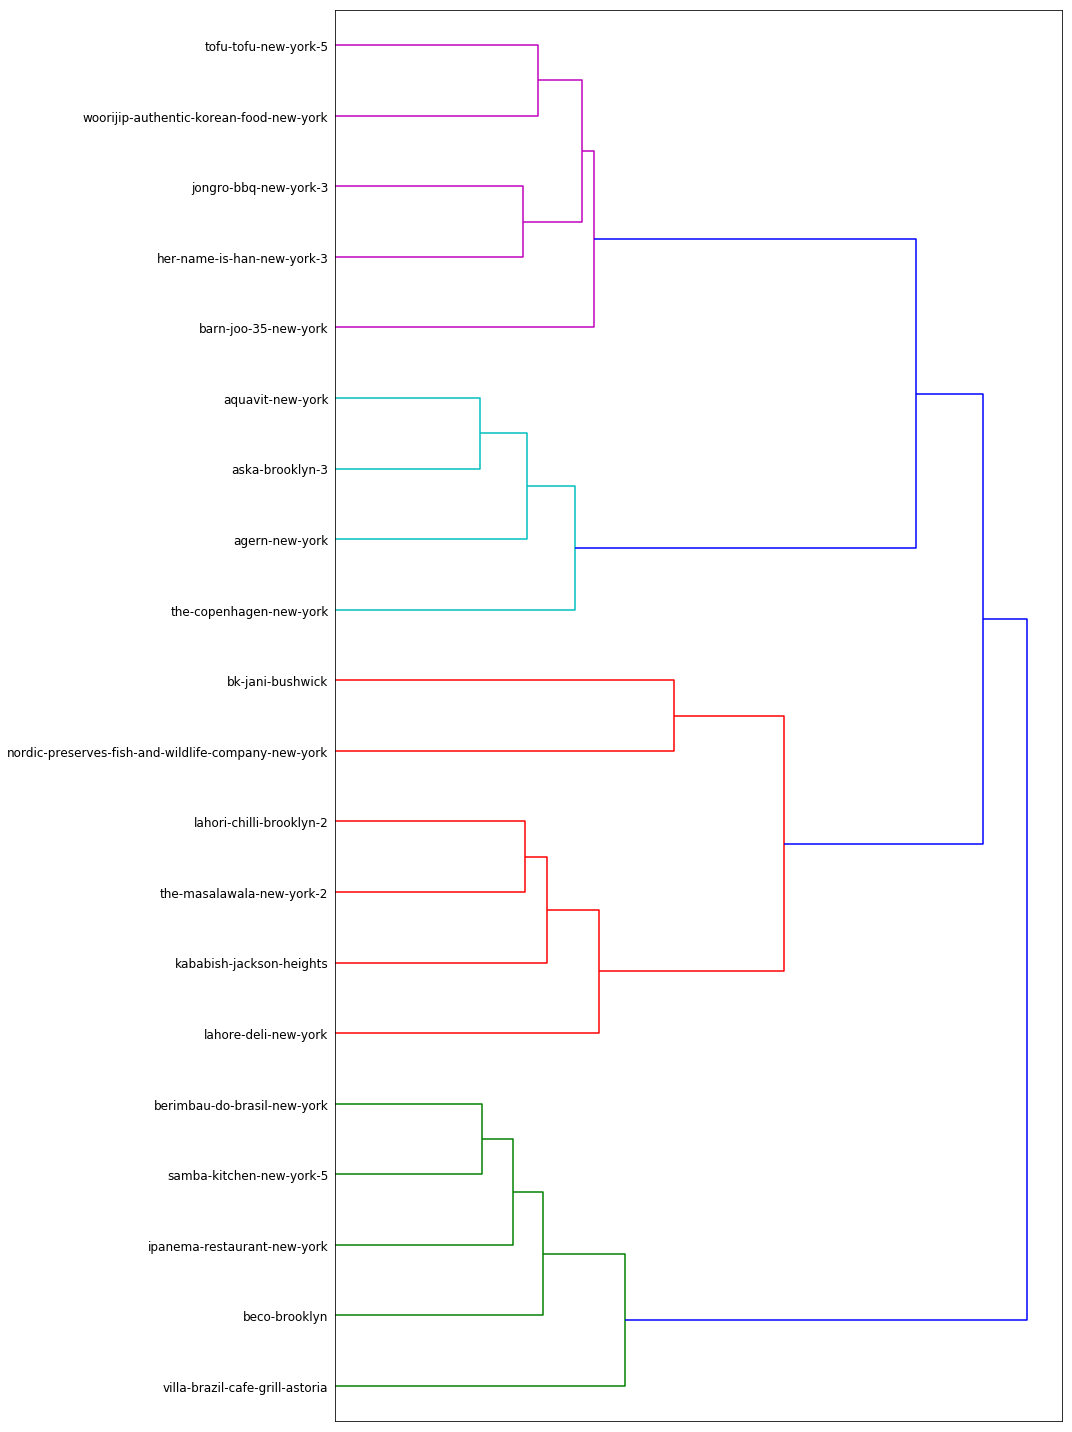

In [35]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=biznames);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

plt.show()
#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) 
#save figure as ward_clusters

Build a dendrogram showing the similarities across the restaurants. Do restaurantas offering the same cuisine cluster together? (10pts.)

Based on our dendogram, it appears that restaurants offering the same cuisine for the most part cluster together. However, there is one exception. A dendogram looks at distances between data points on the y axis, which is based upon height and proximity. It first looks at one point closer to another, and then determines the distance between other seperate clusters. Here, we can scroll down to the pakastani/indian restaurants in green, and see that Nordic Preserves Fish and Wildlife Company cluster together in the same group, over being grouped with the other scandinavian restaurants. This is very interesting because these cuisines would probably be considered very different from each other. In addition, the clustering with the korean restaurants also appears to have some form of proximity/similarities, with the scandinavian restaurants. This is depicted in the bigger blue cluster connecting the two clusters together (macro-cluster). Overall, however, the sames cuisines cluster together.